In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Q.1-  In the above dataset,

 ### a. In case age is less than 18, replace it with mean of age values

In [2]:
file_path = "C:/Users/hp/OneDrive/Desktop/python_2nd/Python Foundation Case Study 2 - Credit Card Case Study/"

In [3]:
customer_acq = pd.read_csv(file_path + 'Customer Acqusition.csv')
customer_acq.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [4]:
df = customer_acq
df.loc[df.Age < 18, 'Age'] = df.Age.mean()
df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [5]:
spend = pd.read_csv(file_path + 'spend.csv' )
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [69]:
df1 = pd.merge(left = customer_acq , right = spend , left_on = 'Customer' , right_on = 'Customer' , how = 'inner' , indicator = True)
cust_limit = 0.50*df1.Limit
df1.loc[df1.Amount > df1.Limit , ['Amount' , 'Limit']] = cust_limit
df1

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,both
1498,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,both


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [70]:
Repayment = pd.read_csv(file_path + 'Repayment.csv')
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [71]:
# change the type of month column from object to datetime
Repayment['Month'] = Repayment['Month'].apply(lambda x: pd.to_datetime(x))

In [72]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SL No:      1499 non-null   float64       
 1   Customer    1500 non-null   object        
 2   Month       1500 non-null   datetime64[ns]
 3   Amount      1500 non-null   float64       
 4   Unnamed: 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 59.6+ KB


In [73]:
df2 = pd.merge(left = customer_acq , right = Repayment , left_on = 'Customer' , right_on = 'Customer' , how = 'inner' , indicator = True) 
df2.drop(df2.columns[11] , axis = 1 , inplace = True)
df2.loc[df2.Amount > df2.Limit , ['Amount' , 'Limit']] = df2.Limit
df2

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00,both


## Q.2 -  From the above dataset create the following summaries:

 ### a. How many distinct customers exist?

In [11]:
customer_acq.Customer.nunique()

100

### b. How many distinct categories exist?

In [12]:
print('Product' , df1.Product.nunique())
print('Segment' , df1.Segment.nunique())
print('Type' , df1.Type.nunique())
print('City' , df1.City.nunique())

Product 3
Segment 5
Type 15
City 8


###  c. What is the average monthly spend by customers?


In [48]:
# change the type of month column from object to datetime
Repayment['Month'] = Repayment['Month'].apply(lambda x: pd.to_datetime(x))

In [49]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SL No:      1499 non-null   float64       
 1   Customer    1500 non-null   object        
 2   Month       1500 non-null   datetime64[ns]
 3   Amount      1500 non-null   float64       
 4   Unnamed: 4  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 59.6+ KB


In [15]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [50]:
# change the type of month column from object to datetime
spend['Month'] = spend['Month'].apply(lambda x: pd.to_datetime(x))

In [17]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [18]:
df3=pd.merge(left=customer_acq, right= spend , left_on='Customer' , right_on = 'Customer' , how = 'inner')
df3

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [51]:
Customer_spend_amount = df3.groupby(['Customer' , 'Month'])[['Amount']].mean().reset_index()
Customer_spend_amount

,Customer,Month,Amount
0,A1,2004-01-03,410556.130
1,A1,2004-01-12,463017.010
2,A1,2004-01-15,23740.460
3,A1,2004-01-25,439656.715
4,A1,2004-02-05,52208.650
...,...,...,...
1252,A95,2004-01-15,240401.500
1253,A96,2004-01-25,54729.660
1254,A97,2004-01-12,139018.260
1255,A98,2004-01-03,284521.060


In [52]:
Customer_spend_amount['Spend_month'] = Customer_spend_amount['Month'].apply(lambda  x:x.month)
Customer_spend_amount

,Customer,Month,Amount,Spend_month
0,A1,2004-01-03,410556.130,1
1,A1,2004-01-12,463017.010,1
2,A1,2004-01-15,23740.460,1
3,A1,2004-01-25,439656.715,1
4,A1,2004-02-05,52208.650,2
...,...,...,...,...
1252,A95,2004-01-15,240401.500,1
1253,A96,2004-01-25,54729.660,1
1254,A97,2004-01-12,139018.260,1
1255,A98,2004-01-03,284521.060,1


In [53]:
Avgmonthlyspend = Customer_spend_amount.groupby(['Customer' , 'Spend_month'])[['Amount']].mean().reset_index()

In [54]:
Avgmonthlyspend

,Customer,Spend_month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
573,A95,1,240401.50000
574,A96,1,54729.66000
575,A97,1,139018.26000
576,A98,1,284521.06000


### d. What is the average monthly repayment by customers?


In [55]:
Customer_repayment_amount = df2.groupby(['Customer' , 'Month'])[['Amount']].mean().reset_index()
Customer_repayment_amount

,Customer,Month,Amount
0,A1,2004-01-03,245899.020
1,A1,2004-01-12,422930.785
2,A1,2004-01-15,356258.850
3,A1,2004-01-25,437555.120
4,A1,2004-02-05,117964.430
...,...,...,...
1276,A95,2004-01-15,369405.960
1277,A96,2004-01-25,100000.000
1278,A97,2004-01-12,10000.000
1279,A98,2004-01-03,10001.000


In [56]:
Repayment.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,2004-01-12,495414.75,NaN


In [57]:
Customer_repayment_amount['month'] = pd.DatetimeIndex(Customer_repayment_amount['Month']).month
Customer_repayment_amount

,Customer,Month,Amount,month
0,A1,2004-01-03,245899.020,1
1,A1,2004-01-12,422930.785,1
2,A1,2004-01-15,356258.850,1
3,A1,2004-01-25,437555.120,1
4,A1,2004-02-05,117964.430,2
...,...,...,...,...
1276,A95,2004-01-15,369405.960,1
1277,A96,2004-01-25,100000.000,1
1278,A97,2004-01-12,10000.000,1
1279,A98,2004-01-03,10001.000,1


In [58]:
Avgmonthlyrepayment = Customer_repayment_amount.groupby(['Customer' , 'month'])[['Amount']].mean().reset_index()
Avgmonthlyrepayment

,Customer,month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
553,A95,1,369405.960
554,A96,1,100000.000
555,A97,1,10000.000
556,A98,1,10001.000


###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment  – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [59]:
Monthlycustomer = pd.merge(left = Avgmonthlyspend , right = Avgmonthlyrepayment , left_on =['Customer' , 'Spend_month'] , right_on = ['Customer' , 'month'])
Monthlycustomer

,Customer,Spend_month,Amount_x,month,Amount_y
0,A1,1,341332.87700,1,325723.331000
1,A1,2,138421.15125,2,137713.785000
2,A1,4,261649.25000,4,254474.580000
3,A1,11,183839.61000,11,285729.090000
4,A10,1,173828.28250,1,283324.721667
...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000
450,A96,1,54729.66000,1,100000.000000
451,A97,1,139018.26000,1,10000.000000
452,A98,1,284521.06000,1,10001.000000


In [60]:
Monthlycustomer['Monthly_profit'] = Monthlycustomer.Amount_y -  Monthlycustomer.Amount_x
Monthlycustomer

,Customer,Spend_month,Amount_x,month,Amount_y,Monthly_profit
0,A1,1,341332.87700,1,325723.331000,-15609.546000
1,A1,2,138421.15125,2,137713.785000,-707.366250
2,A1,4,261649.25000,4,254474.580000,-7174.670000
3,A1,11,183839.61000,11,285729.090000,101889.480000
4,A10,1,173828.28250,1,283324.721667,109496.439167
...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000
450,A96,1,54729.66000,1,100000.000000,45270.340000
451,A97,1,139018.26000,1,10000.000000,-129018.260000
452,A98,1,284521.06000,1,10001.000000,-274520.060000


In [61]:
Monthlycustomer['Profit'] =np.where( Monthlycustomer['Monthly_profit'] >0 ,Monthlycustomer['Monthly_profit']*0.029 , np.nan )
Monthlycustomer.head(10)

,Customer,Spend_month,Amount_x,month,Amount_y,Monthly_profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


###  f. What are the top 5 product types?

In [62]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [63]:
Top_5 = spend.groupby('Type').sum().sort_values('Amount' , ascending = False).head(5).reset_index()
Top_5             

,Type,Sl No:,Amount
0,PETRO,146920,49863174.09
1,CAMERA,113612,41481571.96
2,FOOD,110164,37773338.43
3,TRAIN TICKET,90087,33067077.15
4,AIR TICKET,117877,32955445.42


### g. Which city is having maximum spend?


In [32]:
df1.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,both


In [64]:
max_spend = df1.groupby('City').sum().sort_values('Amount' , ascending = False).head(1)
max_spend

,No,Age,Limit,Sl No:,Amount
City,,,,,
COCHIN,10482,14259.68,92335102.5,226380,45963513.5


### h. Which age group is spending more money?

In [65]:
age = df1.groupby('Age').sum().sort_values('Amount' , ascending = False).head(1)
age

,No,Limit,Sl No:,Amount
Age,,,,
28.0,5101,34655000.0,108467,17365270.23


### i. Who are the top 10 customers in terms of repayment?

In [66]:
Top_10 = df2.groupby('Customer').sum().sort_values('Amount' , ascending = False ).head(10).reset_index()
Top_10

,Customer,No,Age,Limit,SL No:,Amount
0,A61,2318,1672.00,19000000.0,45502.0,10539142.91
1,A60,2280,1064.00,19000000.0,45464.0,9876290.74
2,A13,403,899.00,15500000.0,10148.0,9572000.66
3,A43,1333,651.00,15500000.0,31424.0,8489871.46
4,A45,1395,2077.00,15500000.0,31486.0,8448334.87
5,A12,372,1581.00,15500000.0,10117.0,8334760.16
6,A14,434,1441.19,15500000.0,10179.0,7943268.63
7,A44,1364,868.00,15500000.0,31455.0,7744730.12
8,A39,1209,2418.00,15500000.0,31300.0,7622483.30
9,A42,1302,1550.00,15500000.0,31393.0,7615460.86


## Q.3 - Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [74]:
df1.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,both


In [76]:
df1['yearly_spend'] = df1['Month'].apply(lambda x:x.year)
city_spend = pd.pivot_table( df1 , index = 'City',columns = ['Product' , 'yearly_spend']  , values = 'Amount')
city_spend

Product                Gold                                     Platimum  \
yearly_spend           2004           2005           2006           2004   
City                                                                       
BANGALORE     258052.181667  222282.120517  240612.221800   38370.079310   
BOMBAY        291160.563750  230333.802051  203003.700256   35890.597600   
CALCUTTA      219915.911176  257583.895000  253807.562955   88595.230435   
CHENNAI       176603.083333  311745.465000  245844.420000  186086.967368   
COCHIN        215172.063235  263274.196304  233314.275111  106872.002188   
DELHI         215884.230769  178622.297273  268827.574545   47252.148333   
PATNA         296081.128571  271051.314167  206925.608182  371023.200000   
TRIVANDRUM    241510.284000  177196.550000  273571.087000  144111.778000   

Product                                           Silver                \
yearly_spend           2005           2006          2004          2005   
City                                                                     
BANGALORE      29428.547419   26378.125769  53827.190833  46145.130000   
BOMBAY         32354.770000   31359.032581  48371.730000  46271.685455   
CALCUTTA      123186.008611   87551.381951  50000.600000  55018.382500   
CHENNAI       157936.135000  167497.446667  56411.372000  47148.061250   
COCHIN        112748.220682   98411.845800  50889.351250  50174.567692   
DELHI          54906.428889   58929.573333  48010.768750  55664.655455   
PATNA         360403.883750  179448.235714  47292.756250  47504.709500   
TRIVANDRUM    120048.110000  119300.208333  41933.496000  44985.498333   

Product                     
yearly_spend          2006  
City                        
BANGALORE     52425.220000  
BOMBAY        84064.138462  
CALCUTTA      77197.094667  
CHENNAI       50001.357143  
COCHIN        70555.048333  
DELHI         50288.233529  
PATNA         50000.357143  
TRIVANDRUM    50532.920000

In [ ]:
city_spend.plot(kind = 'bar' , stacked = True)
plt.show()

## Q.4- Create graphs for

### a. Monthly comparison of total spends, city wise

<AxesSubplot:xlabel='City'>

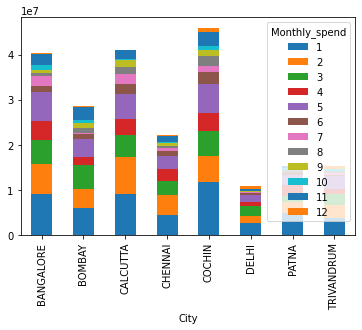

In [77]:
df1['Monthly_spend'] = df1.Month.apply(lambda x:x.month)
pd.pivot_table(df1 , index = 'City' , columns = 'Monthly_spend' , values = 'Amount' , aggfunc = 'sum').plot(kind = 'bar' , stacked = True)

### b. Comparison of yearly spend on air tickets

<AxesSubplot:xlabel='Type'>

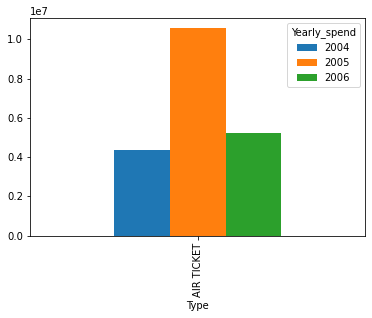

In [78]:
df1['Yearly_spend'] = df1.Month.apply(lambda x:x.year)
pd.pivot_table(df1[df1.Type == "AIR TICKET"] , index = 'Type' , columns = 'Yearly_spend' , values = 'Amount' ,aggfunc = 'sum').plot(kind = 'bar' )

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


<AxesSubplot:xlabel='Product'>

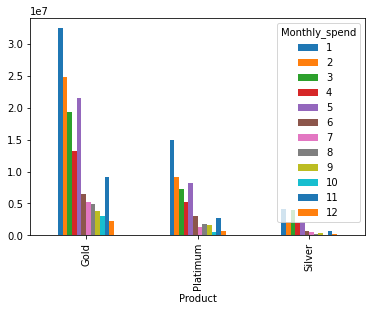

In [79]:
pd.pivot_table(df1 , index = 'Product' , columns = 'Monthly_spend' , values = 'Amount', aggfunc = 'sum').plot(kind = 'bar') #, stacked = True)

## Q.5-  Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [81]:
def top_customers():
    prod = input("Enter product name : ")
    time = input("Enter year  : ")
    Top_10 = df2.groupby(['Customer','City']).sum().sort_values("Amount",ascending = False).head(10)
    return Top_10

In [82]:
top_customers()

Enter product name : Platinum
Enter year  : 2006


,,No,Age,Limit,SL No:,Amount
Customer,City,,,,,
A61,COCHIN,2318,1672.00,19000000.0,45502.0,10539142.91
A60,CALCUTTA,2280,1064.00,19000000.0,45464.0,9876290.74
A13,BANGALORE,403,899.00,15500000.0,10148.0,9572000.66
A43,BANGALORE,1333,651.00,15500000.0,31424.0,8489871.46
A45,COCHIN,1395,2077.00,15500000.0,31486.0,8448334.87
A12,BOMBAY,372,1581.00,15500000.0,10117.0,8334760.16
A14,BANGALORE,434,1441.19,15500000.0,10179.0,7943268.63
A44,DELHI,1364,868.00,15500000.0,31455.0,7744730.12
A39,TRIVANDRUM,1209,2418.00,15500000.0,31300.0,7622483.30
